In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Text(0.5, 1.0, 'Edges')

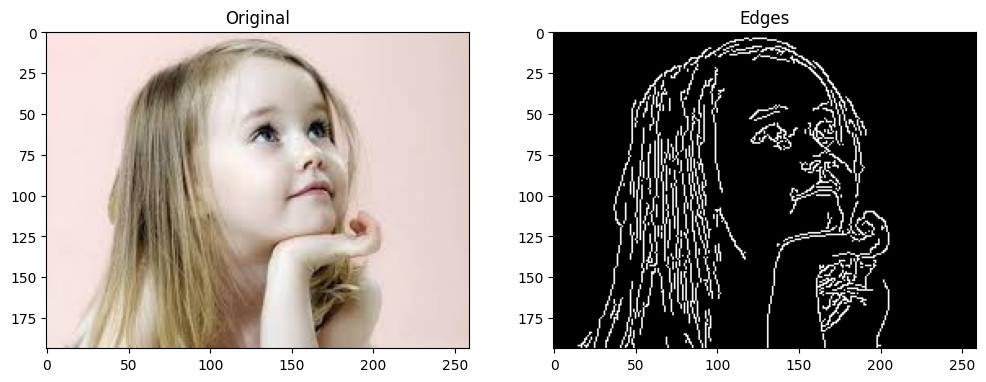

In [2]:
src = cv.imread(r"D:\Opencv\class.vision-master\images\little_girl.jpg")

edges = cv.Canny(src, 100, 200)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(src[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(edges,cmap='gray');plt.title("Edges")

In [3]:
Threshold = 100
window_name = "Edge Map"
title_trackbar = "Min Threshold"
ratio = 3
kernel_size = 3

def CannyThreshold(val):
    low_thereshold = val
    img_blur = cv.GaussianBlur(src_gray, (3,3), 0)
    detected_edges = cv.Canny(img_blur, low_thereshold, low_thereshold*ratio, kernel_size)
    mask = detected_edges !=0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv.imshow(window_name, dst)
    
src = cv.imread(r"D:\Opencv\class.vision-master\images\little_girl.jpg")
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
cv.namedWindow(window_name, cv.WINDOW_GUI_EXPANDED)
cv.createTrackbar(title_trackbar, window_name, 0, Threshold, CannyThreshold)
CannyThreshold(0)
cv.waitKey()
cv.destroyAllWindows()

In [4]:
cap = cv.VideoCapture(0)
while True:
    ret, frame = cap.read()
    src_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(src_gray, 60, 120)
    edges = cv.bitwise_not(edges)
    cv.imshow('Webcam', edges)
    if cv.waitKey(1) & 0xff == 27:
        break
cap.release()
cv.destroyAllWindows()